In [1]:
import random
import warnings

from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузите набор данных для задачи классификации. Вы можете использовать любой доступный набор данных или выбрать один из популярных, таких как Iris, Wine или MNIST.

In [2]:
    from sklearn.datasets import load_wine

# Load the wine dataset into a DataFrame
wine_data = load_wine(as_frame=True)
df = wine_data.frame

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Данные по классификации вина содержат информаю по 14 характеристикам, всего 178 записей. Пропусков в данных нет.
13 характеристик (переменных): имеют числовое значение (непрерывное числовое значение), тип float64, 
таргетная переменная - категориальный признак, имеет целочисленное значение int64.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


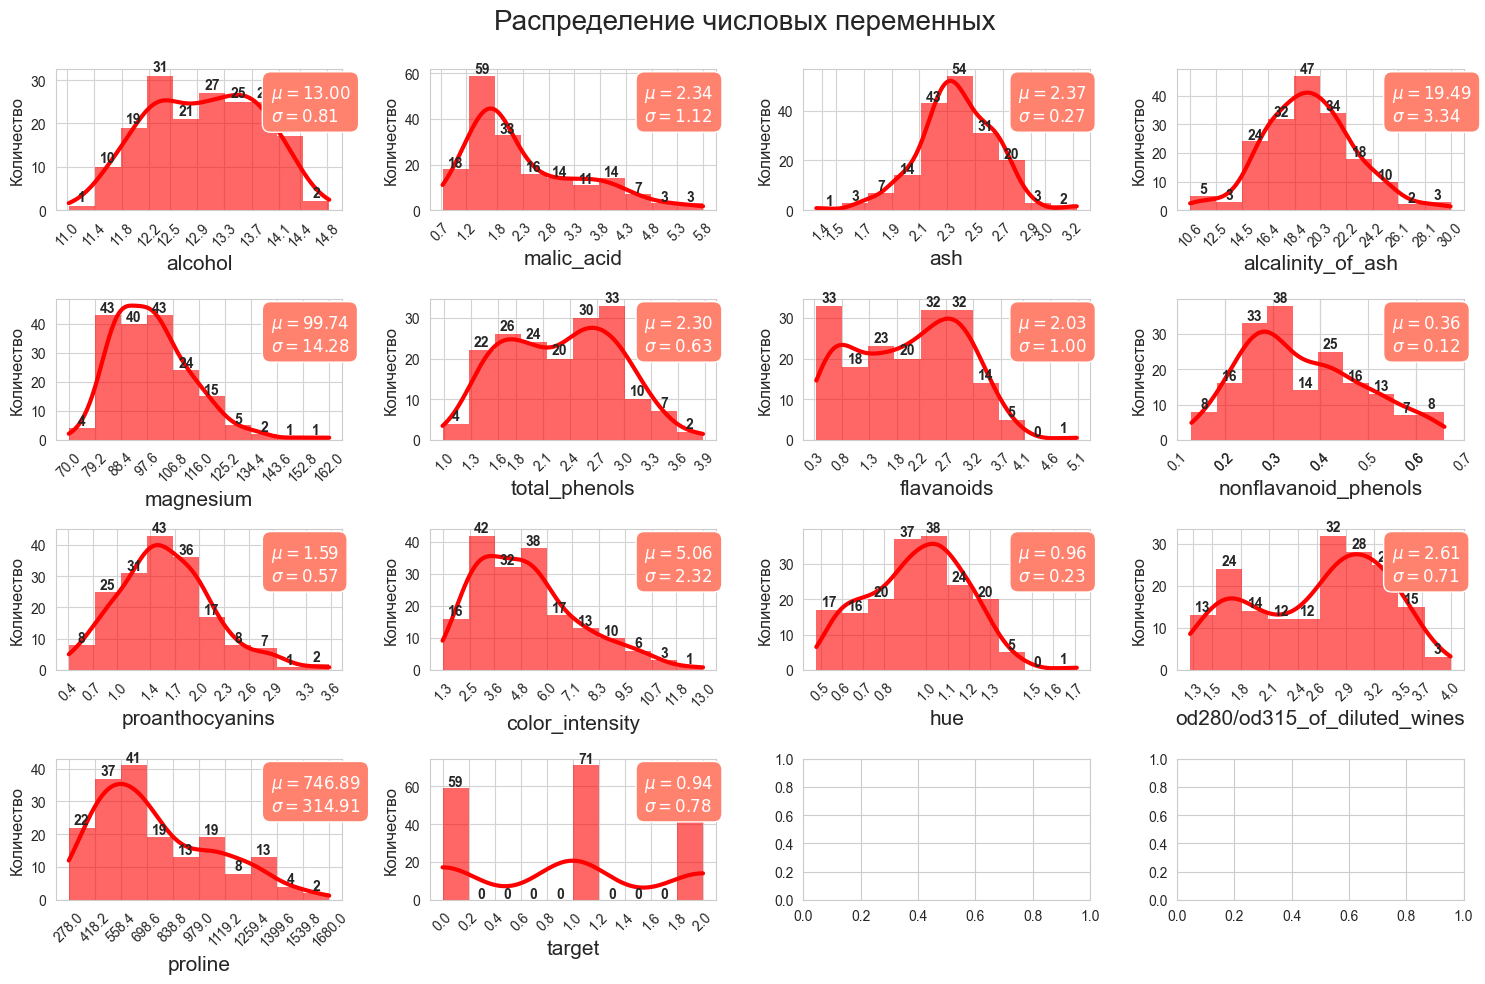

In [7]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df.columns):
    x = i // 4
    y = i % 4
    values, bin_edges = np.histogram(df[col],
                                     range=(df[col].min(), df[col].max()))

    graph = sns.histplot(data=df, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df[col].mean(),
        r'$\sigma=%.2f$' % df[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

В соответствии с описательными характеристиками и графиками, выбросов в данных нет

<Axes: ylabel='Target'>

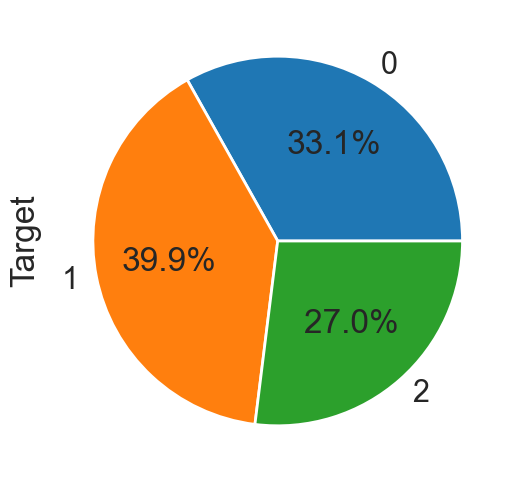

In [8]:
# ваш код здесь
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df.groupby('target').size().plot(kind='pie',
                                       y = "target",
                                       label = "Target",
                                       autopct='%1.1f%%')

Данные распределены относительно равномерно между классами вина.

### Проведите предварительную обработку данных, включая масштабирование и разделение на обучающую и тестовую выборки.

In [45]:
from sklearn.model_selection import train_test_split


X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train))
X_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_test))


 ### Реализуйте алгоритм случайного леса. Включите в него функции для построения деревьев решений, выбора случайных признаков и голосования для принятия решений.

In [63]:
class RandomForestClassifier_my(object):
    

    def __init__(self, n_estimators=100, max_depth=None, max_features=1.0, random_state=0):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.random_state = random_state
        self.general_random = np.random.RandomState(self.random_state)
        self.trained_trees = []
        
        
        
    def _bootstrap(self, X, y):
        import random
        n_samples, n_features = X.shape
        max_features = random.randint(1, n_samples)
        sample_indexes = self.general_random.choice(n_samples, n_samples)
        features = self.general_random.choice(X.columns, round(max_features))
        X_b, y_b = X.iloc[sample_indexes][features], y.iloc[sample_indexes]
        return X_b, y_b
    
    
    def _train_tree(self, X, y):
        from sklearn.tree import DecisionTreeClassifier
        
        tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state)
        return tree.fit(X, y), X.columns


    def fit(self, X, y):
        boot_data = (self._bootstrap(X, y) for _ in range(self.n_estimators))
        train_trees = ((self._train_tree)(X_b, y_b) for X_b, y_b in boot_data)
        self.trained_trees = train_trees


    def predict(self, samples):
        prediction = pd.DataFrame((tree_i.predict)(samples[tree_i_features])
                      for (tree_i, tree_i_features) in self.trained_trees)
        return prediction.mode(axis=0).iloc[0]
 

### Обучите вашу модель случайного леса на обучающей выборке. Оцените производительность модели на тестовой выборке, используя метрики классификации, такие как точность, полнота и F1-мера.

In [66]:
from sklearn.metrics import f1_score, precision_score, recall_score

random_forest_classifier_my = RandomForestClassifier_my()
random_forest_classifier_my.fit(X_train_scaled, y_train)
y_pred_test_my = random_forest_classifier_my.predict(X_test_scaled)
print(f'precision score test: {precision_score(y_test, y_pred_test_my, average='macro')}')
print(f'recall score test: {recall_score(y_test, y_pred_test_my, average='macro')}')
print(f'f1 score test: {f1_score(y_test, y_pred_test_my, average='macro')}')

precision score test: 1.0
recall score test: 1.0
f1 score test: 1.0


### Проведите сравнение результатов вашей модели со стандартной реализацией случайного леса из библиотеки scikit-learn.

In [68]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train_scaled, y_train)
y_pred_test = random_forest_classifier.predict(X_test_scaled)
print(f'precision score test: {precision_score(y_test, y_pred_test, average='macro')}')
print(f'recall score test: {recall_score(y_test, y_pred_test, average='macro')}')
print(f'f1 score test: {f1_score(y_test, y_pred_test, average='macro')}')

precision score test: 1.0
recall score test: 1.0
f1 score test: 1.0
